#### Imports

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pytz
import seaborn as sns
import datetime

from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit, cross_validate

from paris.module_data import get_history, FeaturesBuilder
from paris.module_api import update_history


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from joblib import dump, load
from keras import Sequential,Model
from keras.layers import LSTM, Dense, Input, Dropout



os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"]="true"
DATA_DIR='var/'

token= "YOUR PANDAS SCORE VALID API KEY"

## Initialize features

First we obtain the full history from the pandascore API

In [ ]:
update_history(token)

In [3]:
history=get_history()

Then we instantiate the FeaturesBuilder which first compute the ranking, and then the other features

In [3]:
FB = FeaturesBuilder(recompute_elo=False, recompute_ranking=False)

In [4]:
FB.ranking

,100 thieves,100pinggods,1337huania,1820ht,1adl,1win,2115,26 rising,2be continued,2byl9,...,ze pug godz,zero,zero.tsg,zerozone,zerøzone,zigma,zone,zooweemama,ztayhome,ちんぱんじ～
2016-01-13 12:00:00+00:00,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.0,1400.0,1400.00000,...,1400.000000,1400.000000,1400.00000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.00000,1400.000000
2016-01-20 12:00:00+00:00,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.0,1400.0,1400.00000,...,1400.000000,1400.000000,1400.00000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.00000,1400.000000
2016-01-27 12:00:00+00:00,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.0,1400.0,1400.00000,...,1400.000000,1400.000000,1400.00000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.00000,1400.000000
2016-02-03 12:00:00+00:00,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.0,1400.0,1400.00000,...,1400.000000,1400.000000,1400.00000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.00000,1400.000000
2016-02-10 12:00:00+00:00,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.0,1400.0,1400.00000,...,1400.000000,1400.000000,1400.00000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.00000,1400.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-21 12:00:00+00:00,1679.905551,1387.173099,1378.738009,1360.902057,1400.000000,1445.027239,1360.789374,1380.0,1400.0,1381.90829,...,1617.796955,1400.000000,1452.17579,1417.485640,1436.034243,1443.266379,1376.313432,1277.413875,1490.22653,1383.129275
2020-10-28 12:00:00+00:00,1679.905551,1387.173099,1378.738009,1360.902057,1400.000000,1445.027239,1360.789374,1380.0,1400.0,1381.90829,...,1617.796955,1400.000000,1452.17579,1449.983448,1436.034243,1413.813360,1376.313432,1277.413875,1490.22653,1383.129275
2020-11-04 12:00:00+00:00,1679.905551,1387.173099,1378.738009,1360.902057,1400.000000,1445.027239,1360.789374,1380.0,1400.0,1381.90829,...,1617.796955,1400.000000,1452.17579,1413.930576,1436.034243,1413.813360,1376.313432,1277.413875,1490.22653,1383.129275
2020-11-11 12:00:00+00:00,1679.905551,1387.173099,1378.738009,1360.902057,1401.649928,1445.027239,1360.789374,1380.0,1400.0,1381.90829,...,1617.796955,1413.817122,1452.17579,1413.930576,1436.034243,1413.813360,1376.313432,1277.413875,1490.22653,1383.129275


In [5]:
FB.ranking.loc[:,["fnatic","vitality","g2",'virtus.pro',"mousesports"]]

,fnatic,vitality,g2,virtus.pro,mousesports
2016-01-13 12:00:00+00:00,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
2016-01-20 12:00:00+00:00,1476.872240,1400.000000,1362.292465,1400.000000,1400.000000
2016-01-27 12:00:00+00:00,1476.872240,1400.000000,1362.292465,1400.000000,1400.000000
2016-02-03 12:00:00+00:00,1476.872240,1400.000000,1362.292465,1400.000000,1400.000000
2016-02-10 12:00:00+00:00,1476.872240,1400.000000,1362.292465,1400.000000,1400.000000
...,...,...,...,...,...
2020-10-21 12:00:00+00:00,1677.587887,1788.468574,1666.128163,1809.120308,1592.425749
2020-10-28 12:00:00+00:00,1643.555043,1814.064944,1616.244122,1847.198377,1592.425749
2020-11-04 12:00:00+00:00,1643.555043,1864.767868,1636.585042,1825.555259,1592.425749
2020-11-11 12:00:00+00:00,1607.706684,1853.347934,1680.522359,1816.741110,1592.425749


### A small example on G2 

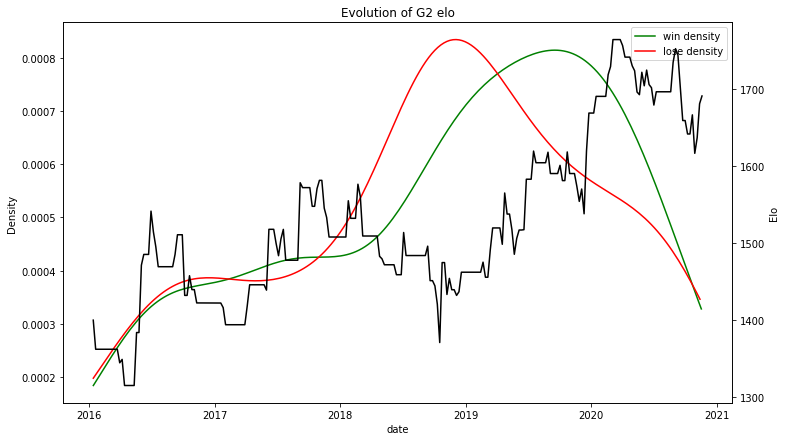

In [6]:
history_s = FB.history_elo
x = history_s[history_s['winner']=='g2']['date']
x2 = history_s[((history_s['team1']=='g2')|(history_s['team2']=='g2'))&(history_s['winner']!='g2')]['date']
fig, ax1 = plt.subplots(figsize=(12,7))
sns.kdeplot(x,ax=ax1,color='g',label="win density",cut=0)
sns.kdeplot(x2,ax=ax1,color='r',label="lose density",cut=0)
ax1.legend()
ax2 = ax1.twinx()
ax2.plot(FB.ranking['g2'],color='k')
plt.ylabel("Elo")
plt.title("Evolution of G2 elo")
plt.show()

## Compute fitness scores

In [40]:
%%time
features = FB.compute_matches_teams_fitness(FB.history_elo)

Wall time: 2min 32s


In [41]:
features.to_csv(DATA_DIR+'new_features.csv')

In [12]:
features = pd.read_csv(DATA_DIR +'new_features.csv',index_col=0)

In [13]:
features

,team1,team2,date,score,winner,elo1,elo2,F_S_team1,F_S_team2
6784,natus vincere,cyberzen,2016-01-13 12:00:00+00:00,2 - 0,natus vincere,1400.000000,1400.000000,0.000000,0.000000
6785,g2,luminosity,2016-01-13 14:00:00+00:00,0 - 2,luminosity,1400.000000,1400.000000,0.000000,0.000000
6787,cyberzen,g2,2016-01-13 17:00:00+00:00,1 - 2,g2,1400.000000,1400.000000,0.000000,0.000000
6786,natus vincere,luminosity,2016-01-13 17:00:00+00:00,0 - 2,luminosity,1400.000000,1400.000000,0.000000,0.000000
6789,ex-titan,?,2016-01-14 09:00:00+00:00,0 - 2,?,1400.000000,1400.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
488638,alternate attax,heretics,2020-11-19 08:00:00+00:00,2 - 0,alternate attax,1516.078298,1583.268283,73.966085,28.125439
488637,k23,project x,2020-11-19 08:00:00+00:00,2 - 0,k23,1520.794983,1443.786686,-60.535043,-52.955290
488747,giants,cyber legacy,2020-11-19 10:50:00+00:00,2 - 1,giants,1365.099703,1455.417675,-72.630185,-100.104314
488635,mbappeek,sj,2020-11-19 11:00:00+00:00,2 - 1,mbappeek,1515.232071,1465.963347,25.921593,-50.764431


<AxesSubplot:xlabel='F_S_team1', ylabel='Density'>

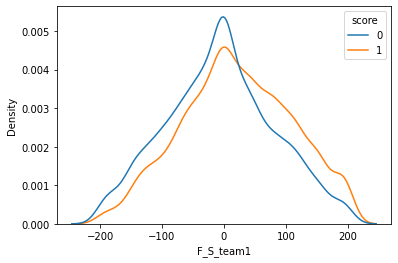

In [14]:
winners = features['score'].apply(lambda x: int(x[0]>x[4]))
features['y'] = winners
sns.kdeplot(features['F_S_team1'],hue=winners,common_norm=False)

<AxesSubplot:xlabel='F_S_team2', ylabel='Density'>

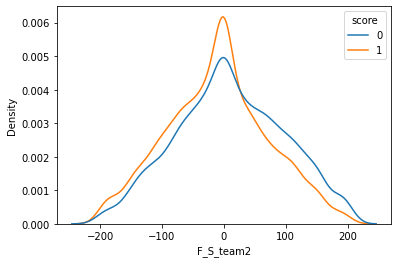

In [45]:
winners = features['score'].apply(lambda x: int(x[0]>x[4]))
features['y'] = winners
sns.kdeplot(features['F_S_team2'],hue=winners,common_norm=False)

In [47]:
def double_train_set(x_train,y_train):
    x_train_rev = x_train.copy()
    x_train_rev.columns = ['elo2','elo1','F_S_team2', 'F_S_team1']
    x_train_rev = x_train_rev[['elo1','elo2','F_S_team1', 'F_S_team2']]
    return pd.concat([x_train,x_train_rev],axis=0),pd.concat([y_train,1-y_train],axis=0)

In [48]:
x,y = double_train_set(features[['elo1','elo2','F_S_team1', 'F_S_team2']],winners)

scaler = StandardScaler()
x[x.columns] = scaler.fit_transform(x[x.columns])
x['y'] = y

<AxesSubplot:xlabel='F_S_team1', ylabel='Density'>

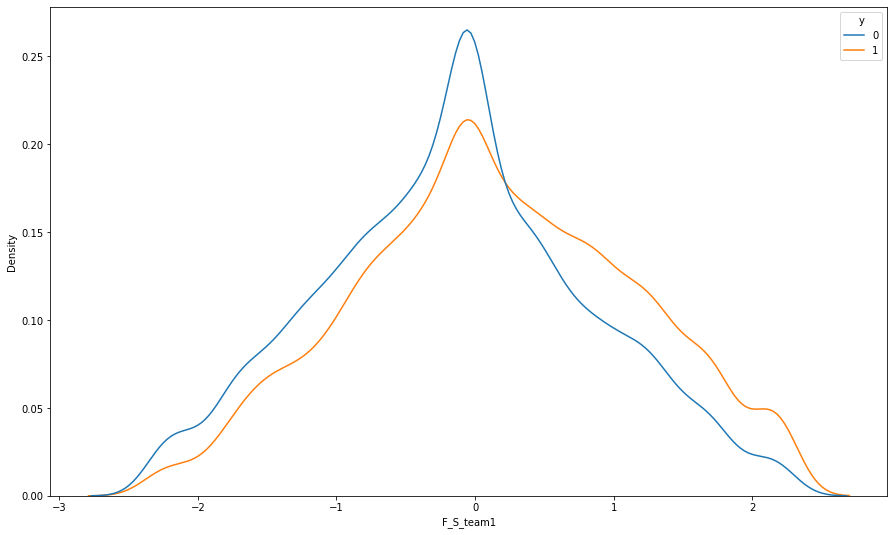

In [49]:
plt.figure(figsize=(15,9))
sns.kdeplot(data=x,x=x['F_S_team1'],hue='y',common_norm=True)


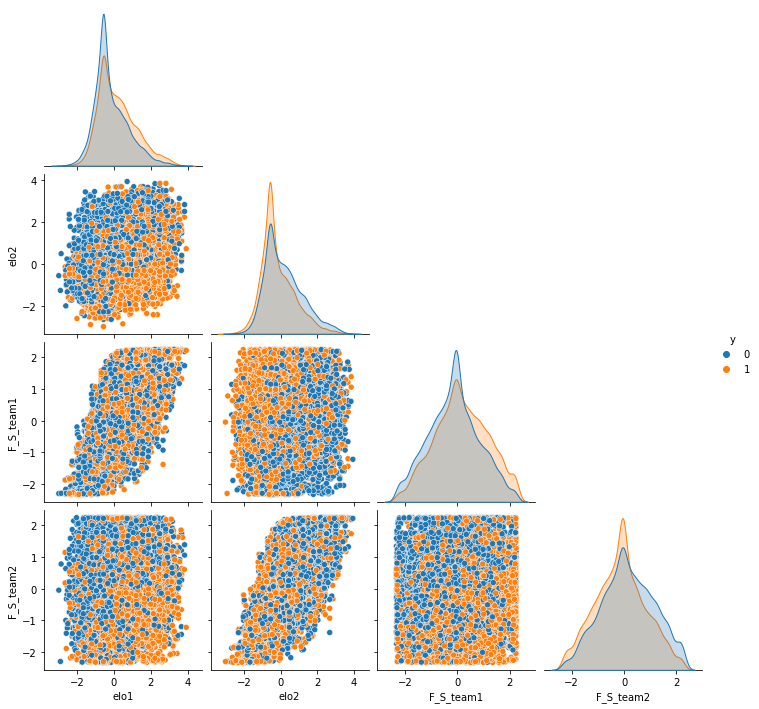

In [62]:
sns.pairplot(data=x,hue='y',corner=True)

In [51]:
corr = x.corr()

<AxesSubplot:>

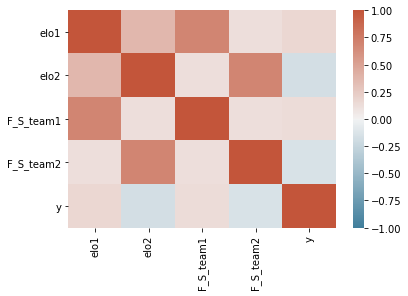

In [61]:
cmap = sns.diverging_palette(230,20, as_cmap=True)
sns.heatmap(corr,vmin=-1,vmax=1,cmap=cmap)

### Model testing

#### Preprocessing


In [16]:
X = features[['elo1','elo2','F_S_team1','F_S_team2']]
Y = features['y']

In [17]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [18]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.2,shuffle=False)

In [26]:
cv = TimeSeriesSplit(5)

#### Model LSTM

In [45]:
inputs = Input(shape=(4,1))
lstm1 = LSTM(128, return_sequences=True,activation='relu')(inputs)
dropout1 = Dropout(0.5)(lstm1)
lstm2 = LSTM(54,activation='relu')(dropout1)
dropout2 = Dropout(0.5)(lstm2)
dense1 = Dense(32,activation='relu')(dropout2)
dense2 = Dense(1,activation='sigmoid')(dense1)
model = Model(inputs=inputs,outputs=dense2,name='rnn_1')
model.summary()

Model: "rnn_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 4, 1)]            0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 4, 128)            66560     
_________________________________________________________________
dropout_13 (Dropout)         (None, 4, 128)            0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 54)                39528     
_________________________________________________________________
dropout_14 (Dropout)         (None, 54)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 32)                1760      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 33    

In [46]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='RMSprop')

In [48]:
model.fit(xtrain,ytrain,batch_size=64,epochs=5,shuffle=False,validation_data=(xtest,ytest))

Epoch 1/5
161/161 [==============================] - 1s 8ms/step - loss: 0.6613 - accuracy: 0.6055 - val_loss: 0.6262 - val_accuracy: 0.6332
Epoch 2/5
161/161 [==============================] - 1s 8ms/step - loss: 0.6599 - accuracy: 0.6109 - val_loss: 0.6228 - val_accuracy: 0.6425
Epoch 3/5
161/161 [==============================] - 1s 8ms/step - loss: 0.6586 - accuracy: 0.6093 - val_loss: 0.6224 - val_accuracy: 0.6464
Epoch 4/5
161/161 [==============================] - 1s 8ms/step - loss: 0.6566 - accuracy: 0.6103 - val_loss: 0.6203 - val_accuracy: 0.6502
Epoch 5/5
161/161 [==============================] - 1s 8ms/step - loss: 0.6566 - accuracy: 0.6121 - val_loss: 0.6213 - val_accuracy: 0.6506


#### Model Dense

In [49]:
model = Sequential()
model.add(Dense(128,activation='relu',input_shape=(4,)))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 128)               640       
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_16 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 65        
Total params: 8,961
Trainable params: 8,961
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')

In [51]:
model.fit(xtrain,ytrain,batch_size=32,epochs=20,shuffle=False,validation_data=(xtest,ytest))

Epoch 1/20
322/322 [==============================] - 1s 2ms/step - loss: 0.6594 - accuracy: 0.6041 - val_loss: 0.6169 - val_accuracy: 0.6545
Epoch 2/20
322/322 [==============================] - 0s 1ms/step - loss: 0.6538 - accuracy: 0.6160 - val_loss: 0.6154 - val_accuracy: 0.6522
Epoch 3/20
322/322 [==============================] - 0s 1ms/step - loss: 0.6526 - accuracy: 0.6241 - val_loss: 0.6158 - val_accuracy: 0.6530
Epoch 4/20
322/322 [==============================] - 0s 1ms/step - loss: 0.6522 - accuracy: 0.6142 - val_loss: 0.6155 - val_accuracy: 0.6545
Epoch 5/20
322/322 [==============================] - 0s 1ms/step - loss: 0.6498 - accuracy: 0.6229 - val_loss: 0.6147 - val_accuracy: 0.6533
Epoch 6/20
322/322 [==============================] - 0s 1ms/step - loss: 0.6518 - accuracy: 0.6201 - val_loss: 0.6153 - val_accuracy: 0.6522
Epoch 7/20
322/322 [==============================] - 0s 1ms/step - loss: 0.6509 - accuracy: 0.6196 - val_loss: 0.6150 - val_accuracy: 0.6588
Epoch 

#### SVM

In [86]:
X
x,xval,y,yval = train_test_split(X,Y,test_size = 0.2,shuffle=False)
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2,shuffle=False)

{'fit_time': array([0.15563655, 0.60724926, 1.41719437, 2.37583661, 3.57991791]),
 'score_time': array([0.08031845, 0.13151813, 0.19093776, 0.2623868 , 0.31856799]),
 'test_accuracy': array([0.59459459, 0.60111836, 0.61276794, 0.64026095, 0.65750233]),
 'test_recall': array([0.5539749 , 0.78197425, 0.75      , 0.76601196, 0.7751073 ])}

In [65]:
res = []
for C in [0.1,0.2,0.5,1,5,10,100]:
    clf = SVC(C=C,probability=True,verbose=True)
    res.append(cross_validate(clf,X,Y,cv=TimeSeriesSplit(5),scoring=['accuracy','roc_auc']))

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

In [71]:
pd.concat([pd.Series(ressi) for ressi in res],axis=1)

,0,1,2,3,4,5,6
fit_time,"[0.5858364105224609, 2.2876484394073486, 5.804...","[0.5793519020080566, 2.3161263465881348, 6.521...","[0.7550864219665527, 3.8400893211364746, 10.09...","[0.8700625896453857, 3.6981492042541504, 8.899...","[0.7488307952880859, 2.9236788749694824, 7.504...","[2.1126277446746826, 15.243470191955566, 15.72...","[2.600674629211426, 9.967443704605103, 23.1380..."
score_time,"[0.14725422859191895, 0.2731444835662842, 0.40...","[0.1380467414855957, 0.27300262451171875, 0.53...","[0.17010211944580078, 0.4400043487548828, 0.62...","[0.20026326179504395, 0.3569350242614746, 0.51...","[0.15371322631835938, 0.2696340084075928, 0.40...","[0.3715338706970215, 1.0667331218719482, 0.474...","[0.16356372833251953, 0.3091738224029541, 0.46..."
test_accuracy,"[0.5908667287977633, 0.5959925442684063, 0.612...","[0.5945945945945946, 0.6020503261882573, 0.615...","[0.5973904939422181, 0.603448275862069, 0.6141...","[0.5945945945945946, 0.6011183597390494, 0.612...","[0.5959925442684063, 0.6006523765144455, 0.609...","[0.592264678471575, 0.5987884436160298, 0.6071...","[0.5857409133271202, 0.5931966449207828, 0.608..."
test_roc_auc,"[0.6401466854973183, 0.6132793462044949, 0.650...","[0.6393239444055805, 0.6147125863509688, 0.650...","[0.6389834087879307, 0.6162018261124454, 0.650...","[0.6381650673811754, 0.6160110774238428, 0.650...","[0.6298153452212822, 0.6139460916206201, 0.646...","[0.6236461069387432, 0.6133729705608274, 0.642...","[0.5963126240161204, 0.6013584281608064, 0.632..."


In [50]:
scores = []
for clf in models:
    score = clf.score(xtest,ytest)
    scores.append(score)
    

In [62]:
val_scores = []
for clf in models:
    score = clf.score(xval,yval)
    val_scores.append(score)

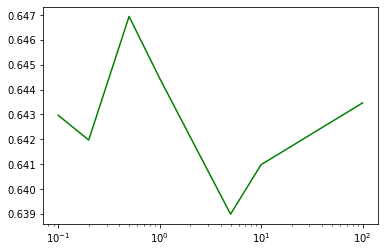

In [126]:
plt.plot([0.1,0.2,0.5,1,5,10,100],scores,'g')
plt.xscale('log')

In [59]:
best_clf = models[2]

In [60]:
best_clf.score(xtest,ytest)

0.6469418199900547

In [61]:
best_clf.score(xval,yval)

0.645186953062848

In [141]:
probas =best_clf.predict_proba(xtest)


### XGB

In [154]:
clf = XGBClassifier(n_estimators=200,learning_rate=0.01)

In [155]:
clf.fit(xtrain,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [156]:
probas2 = clf.predict_proba(xtest)
(np.argmax((probas+probas2)/2,axis=1) == ytest).mean()

0.6449527598209845